<a href="https://colab.research.google.com/github/LemosHenri/DinamicaTumoral_SCML/blob/main/MetodosClassicos/Murray_FDM_1D_CrankNicolson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
class Murray_FDM:

    a: np.ndarray
    b: np.ndarray

    def __init__(self, l, tf, d, p, dx, dt, size):



        dl = d / (p * l**2)
        lb = (dl * dt) / dx**2
        gamma1 = 1. - 0.5 * dt + lb
        gamma2 = 1. + 0.5 * dt - lb

        a = np.zeros((size, size))
        b = np.zeros((size, size))

        a[0,0], b[0,0] = 3 / (2 * dx), -3 / (2 * dx)
        a[0,1], b[0,1] = -4 / (2 * dx), 4 / (2 * dx)
        a[0,2], b[0,2] = 1 / (2 * dx), -1 / (2 * dx)

        a[-1, -1], b[-1, -1] = -3 / (2 * dx), 3 / (2 * dx)
        a[-1, -2], b[-1, -2] = 4 / (2 * dx), -4 / (2 * dx)
        a[-1, -3], b[-1, -3] = -1 / (2 * dx), 1 / (2 * dx)

        for i in range(1, size-1):
            a[i, i], b[i,i] = gamma1, gamma2
            a[i, i+1], b[i,i+1] = -0.5 * lb, 0.5 * lb
            a[i, i-1], b[i,i-1] = -0.5 * lb, 0.5 * lb

        self.a = a
        self.b = b

    def __call__(self, x):

        dir = self.b @ x
        return np.linalg.solve(self.a, dir)


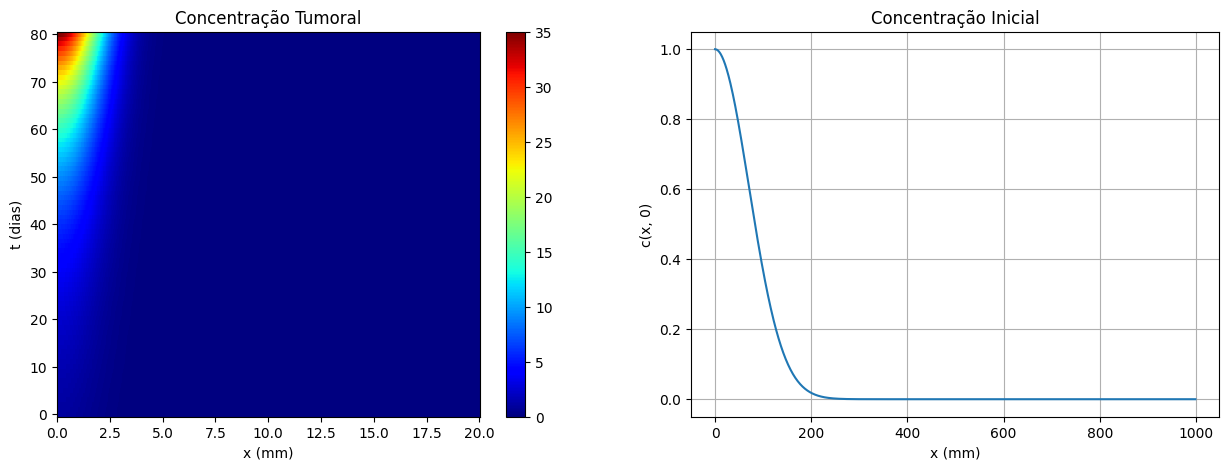

In [22]:
# PARÂMETROS DIMENSIONAIS
l = 20
tf = 80

#PARAMETROS DO MODELO
d = 0.0139
p = 0.0453

x = np.linspace(0, 1, 1000)
t = np.linspace(0, tf * p, tf)

murray = Murray_FDM(20, 80, 0.0039, 0.0953, x[1], t[1], len(x))

result = np.zeros((tf, len(x)))
result[0] = np.exp(-100 * (x - 0)**2)
for i in range(1, tf): result[i] = murray(result[i-1])

fig, ax = plt.subplots(ncols=2, figsize = (15, 5))
p1 = ax[0].pcolormesh(x * l, t / p, result, cmap = 'jet')
ax[0].set_xlabel('x (mm)')
ax[0].set_ylabel('t (dias)')
ax[0].set_title('Concentração Tumoral')

ax[1].plot(result[0])
ax[1].set_xlabel('x (mm)')
ax[1].set_ylabel('c(x, 0)')
ax[1].set_title('Concentração Inicial')
ax[1].grid()
plt.colorbar(p1)
plt.show()

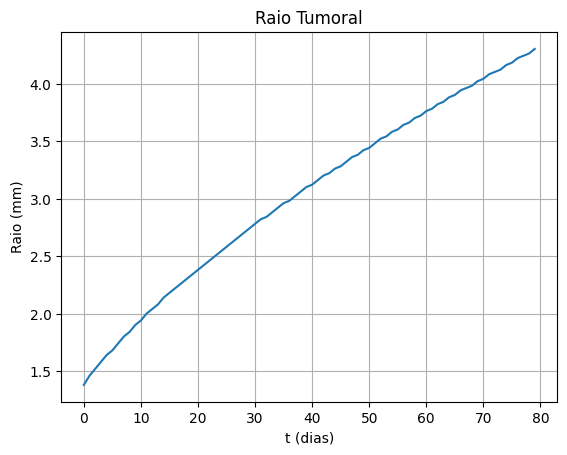

In [23]:
raio = np.zeros(tf)

for i in range(tf):
  raio[i] = np.max(np.where(result[i] >= 0.6126, x * l, 0))

plt.plot(raio)
plt.grid()
plt.xlabel('t (dias)')
plt.ylabel('Raio (mm)')
plt.title('Raio Tumoral')
plt.show()